In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from altair import Chart


midwest= pd.read_csv("http://goo.gl/G1K41K")
# Filtering
midwest= midwest[midwest.poptotal<50000]

print midwest.head()





   PID     county state   area  poptotal   popdensity  popwhite  popblack  \
1  562  ALEXANDER    IL  0.014     10626   759.000000      7054      3496   
2  563       BOND    IL  0.022     14991   681.409091     14477       429   
3  564      BOONE    IL  0.017     30806  1812.117650     29344       127   
4  565      BROWN    IL  0.018      5836   324.222222      5264       547   
5  566     BUREAU    IL  0.050     35688   713.760000     35157        50   

   popamerindian  popasian    ...     percollege  percprof  poppovertyknown  \
1             19        48    ...      11.243308  2.870315            10529   
2             35        16    ...      17.033819  4.488572            14235   
3             46       150    ...      17.278954  4.197800            30337   
4             14         5    ...      14.475999  3.367680             4815   
5             65       195    ...      18.904624  3.275891            35107   

   percpovertyknown  percbelowpoverty  percchildbelowpovert  p

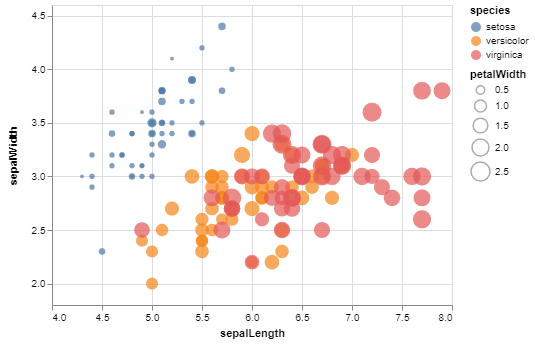

In [7]:
alt.renderers.enable('notebook')

import altair as alt
from vega_datasets import data

iris = data.iris()

alt.Chart(iris).mark_circle().encode(
    alt.X('sepalLength', scale=alt.Scale(zero=False)),
    alt.Y('sepalWidth', scale=alt.Scale(zero=False, padding=1)),
    color='species',
    size='petalWidth'
)

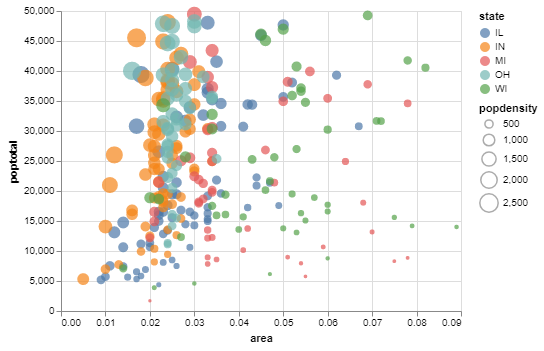

In [8]:
alt.Chart(midwest).mark_circle().encode(
    alt.X('area', scale=alt.Scale(zero=False)),
    alt.Y('poptotal', scale=alt.Scale(zero=False, padding=1)),
    color='state',
    size='popdensity'
)

                                         EC Filename  Wrapper Name  Kmer Size  \
0  fiona_rep.seq_sim_rl_50_cov_2_1_405000.correct...  run.fiona.sh         18   
1  bfc_TRA.rep.seq_sim_rl_50_cov_1_1_18.corrected...    run.bfc.sh         18   
2  coral_rep.seq_sim_rl_50_cov_2_1_18.corrected.f...  run.coral.sh         18   
3  coral_rep.seq_sim_rl_50_cov_4_1_18.corrected.f...  run.coral.sh         18   
4  coral_TRA.rep.seq_sim_rl_50_cov_1_1_18.correct...  run.coral.sh         18   

   Read - TP  Read - TN  Read - FN  Read - FN WRONG  Read - FP  \
0          0          3          5                0          0   
1          2          5          2                0          1   
2          0          3          5                0          0   
3          0          7          9                0          0   
4         82        108         52                0          6   

   Read - FP INDEL  Total Trimmed Reads   ...     Base - FP TRIM  \
0                0                    0   ...   

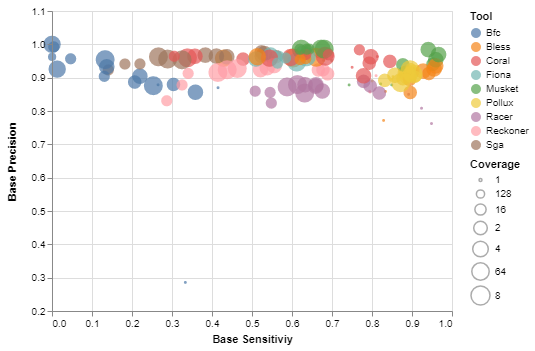

In [21]:
import pandas
import ply
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import re

data = pandas.read_csv("prelim_analysis.csv")


def tool_name(list):
    tool_list = []
    for item in list:
        item = item.replace("run.", '')
        item = item.replace(".sh", '')
        tool_list.append(item.capitalize())
    return tool_list


def length(list):
    cover = []
    for item in list:
        if "50" in item:
            cover.append(50)
        elif "75" in item:
            cover.append(75)
        elif "100" in item:
            cover.append(100)
    return cover


def coverage(list):
    coverage = []
    for item in list:
        m = re.search("cov_(\d+)_", item)
        coverage.append(m.groups()[0])
    return coverage


def dataset(list):
    dataset_list = []
    for item in list:
        if "TRA" in item:
            dataset_list.append("TRA")
        else:
            dataset_list.append("IGH")

    return dataset_list


data["Tool"] = tool_name(data["Wrapper Name"])
data["Coverage"] = coverage(data["EC Filename"])
data["Length"] = length(data["EC Filename"])
data["Base Sensitiviy"] = data["Base - TP"] / (data["Base - TP"] + data["Base - FN"])
data["Base Precision"] = data["Base - TP"] / (data["Base - TP"] + data["Base - FP"] + data["Base - FP INDEL"])
data["Base Gain"] = (data["Base - TP"] - (data["Base - FP"] + data["Base - FP INDEL"])) / \
                    (data["Base - TP"] + data["Base - FN"])

data["Dataset"] = dataset(data["EC Filename"])

print data.head()

# z = data.groupby(["Tool", "Dataset", "Coverage"])["Base Sensitiviy"].mean()
# y = data.groupby(["Tool", "Dataset", "Coverage"])["Base Precision"].mean()
# x = data.groupby(["Tool", "Dataset", "Coverage"])["Base Gain"].mean()
# y = y.fillna(1)
# n = z.index

tra = data[(data["Dataset"]=="TRA")]


alt.Chart(tra).mark_circle().encode(
    alt.X('Base Sensitiviy', scale=alt.Scale(zero=False)),
    alt.Y('Base Precision', scale=alt.Scale(zero=False, padding=1)),
    color='Tool',
    size='Coverage'
)

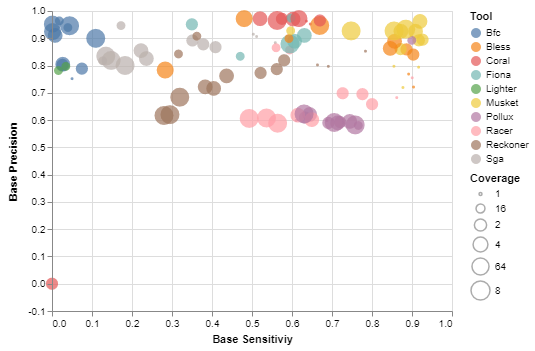

In [20]:
igh = data[(data["Dataset"]=="IGH")]


alt.Chart(igh).mark_circle().encode(
    alt.X('Base Sensitiviy', scale=alt.Scale(zero=False)),
    alt.Y('Base Precision', scale=alt.Scale(zero=False, padding=1)),
    color='Tool',
    size='Coverage'
)

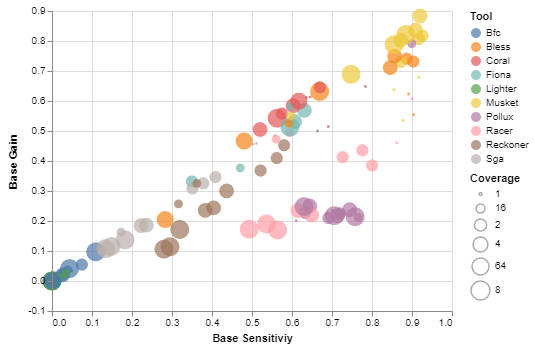

In [23]:
igh = data[(data["Dataset"]=="IGH") & (data["Base Gain"]>-10)]


alt.Chart(igh).mark_circle().encode(
    alt.X('Base Sensitiviy', scale=alt.Scale(zero=False)),
    alt.Y('Base Gain', scale=alt.Scale(zero=False, padding=1)),
    color='Tool',
    size='Coverage'
)

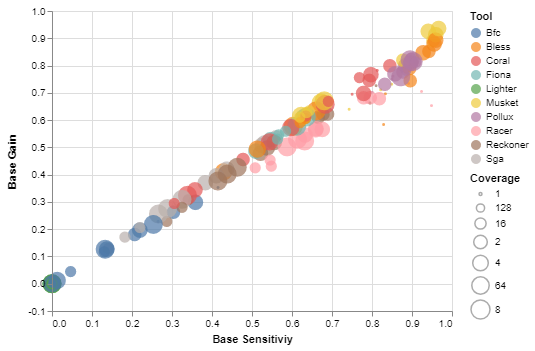

In [26]:
tra = data[(data["Dataset"]=="TRA") & (data["Base Gain"]>-0.3)]


alt.Chart(tra).mark_circle().encode(
    alt.X('Base Sensitiviy', scale=alt.Scale(zero=False)),
    alt.Y('Base Gain', scale=alt.Scale(zero=False, padding=1)),
    color='Tool',
    size='Coverage'
)

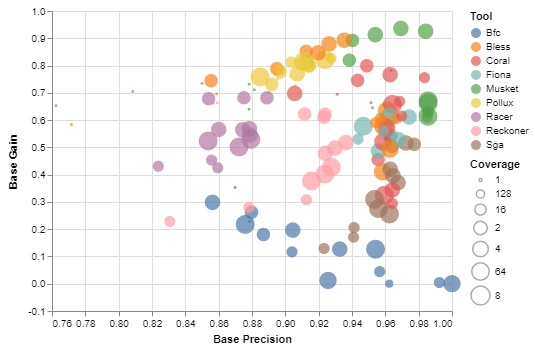

In [27]:
tra = data[(data["Dataset"]=="TRA") & (data["Base Gain"]>-0.3)]


alt.Chart(tra).mark_circle().encode(
    alt.X('Base Precision', scale=alt.Scale(zero=False)),
    alt.Y('Base Gain', scale=alt.Scale(zero=False, padding=1)),
    color='Tool',
    size='Coverage'
)

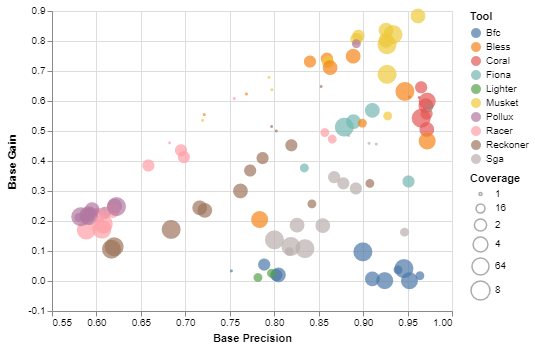

In [28]:
igh = data[(data["Dataset"]=="IGH") & (data["Base Gain"]>-0.3)]


alt.Chart(igh).mark_circle().encode(
    alt.X('Base Precision', scale=alt.Scale(zero=False)),
    alt.Y('Base Gain', scale=alt.Scale(zero=False, padding=1)),
    color='Tool',
    size='Coverage'
)

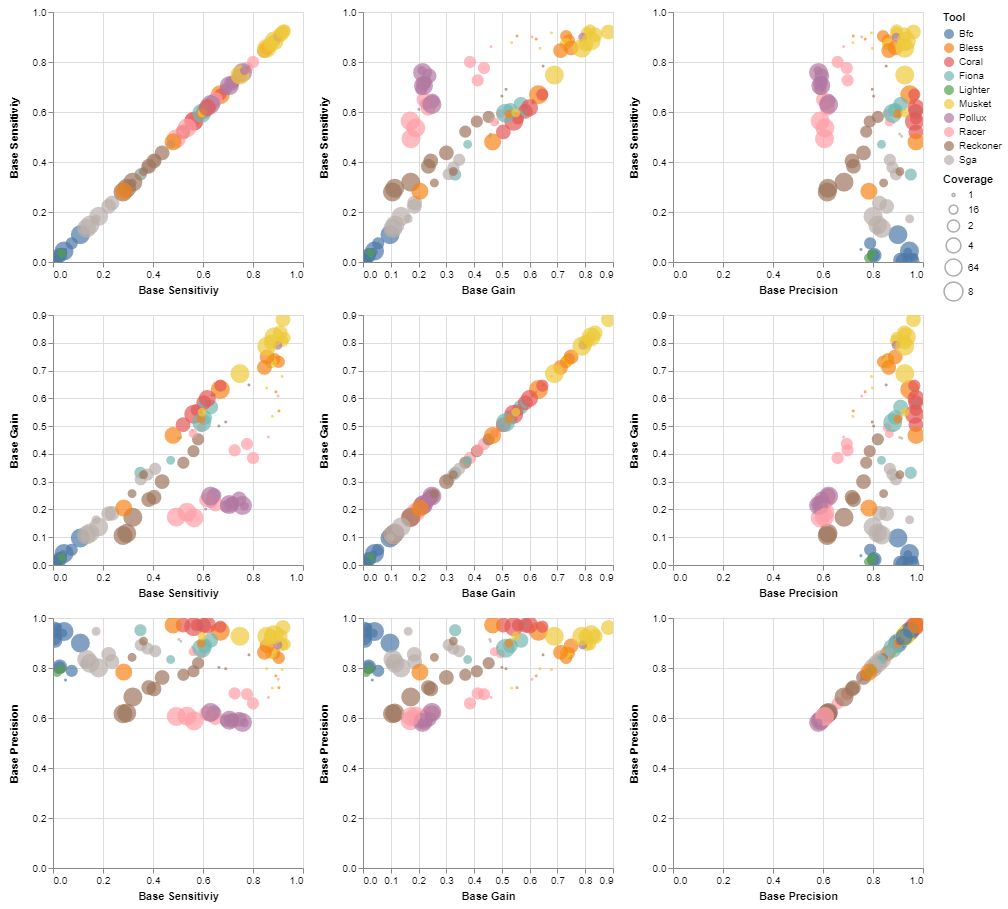

In [30]:

alt.Chart(igh).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Tool',
    size='Coverage'
).properties(
    width=250,
    height=250
).repeat(
    row=['Base Sensitiviy', 'Base Gain', 'Base Precision'],
    column=['Base Sensitiviy', 'Base Gain', 'Base Precision']
).interactive()